### Lab 7: Higgs Classification

In [1]:
import pickle
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
infile = open ("lab5/qcd_100000_pt_250_500.pkl",'rb') # signal dataset
qcd = pickle.load(infile)
infile = open ("lab5/higgs_100000_pt_250_500.pkl",'rb') # background dataset
higgs = pickle.load(infile)

# list all keys of the files
print(qcd.keys())
print(higgs.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


## 1) Make a stacked histogram plot for the feature variable: mass

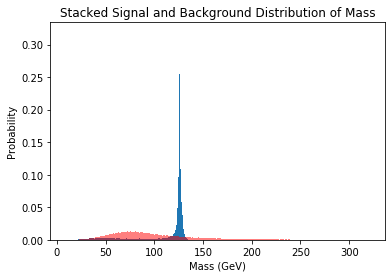

In [2]:
plt.hist(higgs['mass'], 500, density=True)
plt.hist(qcd['mass'], 500, color='red', alpha=.5, density=True)
plt.title('Stacked Signal and Background Distribution of Mass')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# a. Evaluate expected significance without any event selection

In [3]:
lenMass = len(qcd['mass'])
meanBG = np.mean(qcd['mass'])
prob = stats.poisson.cdf(125, meanBG) # x signal is eyeballed to 125
sigma = stats.norm.ppf(prob)
print('The signal of 125 is ', sigma, '\N{greek small letter sigma}')

lenSigMass = len(higgs['mass'])
NBG = 20000
NSig = 100
value = NSig / math.sqrt(NBG)
print('length of signal / square root of length of background = ', value)

The signal of 125 is  2.70499414329355 σ
length of signal / square root of length of background =  0.7071067811865475


The significance values and this calculated ratio are off by a about 2$\sigma$

## 2) Identify mass cuts to optimize the expected significance.

# a. Try different mass cuts systematically

normalize to 1 and then multiply by N(200000, 100) and then cut off and left and right of signal.

88.0
108.0


0.2713073840753751
27.130738407532956


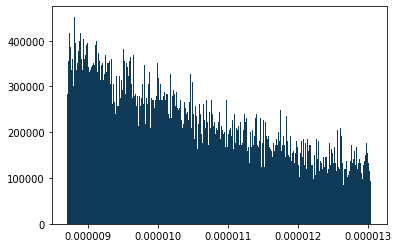

In [ ]:
# Cut at 1σ
# divide by each value of 100000 then multiply by 20000
oneSigAboveProb = 1 - stats.norm.cdf(1)
oneSigBelowProb = stats.norm.cdf(1)
oneSigAbove = stats.poisson.ppf(1 - oneSigAboveProb, meanBG)
oneSigBelow = stats.poisson.ppf(oneSigAboveProb, meanBG)
print(oneSigBelow)
print(oneSigAbove)
total = sum(qcd['mass'])
totalSig = sum(higgs['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 150 and qcd['mass'][i] > 100):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 150 and higgs['mass'][i] > 100):
        newSig1.append(higgs['mass'][i])

newNorm = []
for x in newArr1:
    newNorm.append(x / total)
newNorm = newNorm * 20000

newNormSig = []
for x in newArr1:
    newNormSig.append(x / totalSig)
newNormSig = newNormSig * 100

print(sum(newNormSig))
print(sum(newNorm))

plt.hist(newNormSig, 500, density=True)
plt.hist(newNorm, 500, density=True, color='red', alpha=.5)
plt.show()

# # Cut at 3σ
# oneSigAboveProb = 1 - stats.norm.cdf(3)
# oneSigBelowProb = stats.norm.cdf(3)
# oneSigAbove = stats.poisson.ppf(1 - oneSigAboveProb, meanBG)
# oneSigBelow = stats.poisson.ppf(oneSigAboveProb, meanBG)
# print(oneSigBelow)
# print(oneSigAbove)
# newArr2 = []
# for i in range(len(qcd['mass'])):
#     if(qcd['mass'][i] < oneSigAbove and qcd['mass'][i] > oneSigBelow):
#         newArr2.append(qcd['mass'][i])
# meanNew = np.mean(newArr2)
# newProb = stats.poisson.cdf(125, meanNew)
# newSigma = stats.norm.ppf(newProb)
# print(newSigma)
# 
# # Cut at 5σ
# oneSigAboveProb = 1 - stats.norm.cdf(5)
# oneSigBelowProb = stats.norm.cdf(5)
# oneSigAbove = stats.poisson.ppf(1 - oneSigAboveProb, meanBG)
# oneSigBelow = stats.poisson.ppf(oneSigAboveProb, meanBG)
# print(oneSigBelow)
# print(oneSigAbove)
# newArr3 = []
# for i in range(len(qcd['mass'])):
#     if(qcd['mass'][i] < oneSigAbove and qcd['mass'][i] > oneSigBelow):
#         newArr3.append(qcd['mass'][i])
# meanNew = np.mean(newArr3)
# newProb = stats.poisson.cdf(125, meanNew)
# newSigma = stats.norm.ppf(newProb)
# print(newSigma)

# plt.hist(newSig1, 500, density=True, stacked=True)
# plt.hist(newArr1, 500, density=True, color='black', alpha=.5) # 1σ cut
# # plt.hist(newArr2, 500, density=True, color='red', alpha=.5) # 2σ cut
# # plt.hist(newArr3, 500, density=True, color='green', alpha=.5) # 3σ cut
# plt.show()

88.0
108.0


2.7560405406931734
69.0
129.0


3.1204670205358305
53.0
151.0


3.3692899609177998


<module 'matplotlib.pyplot' from '/Users/anthonyjoo/Documents/PHYS434/PHYS434/venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

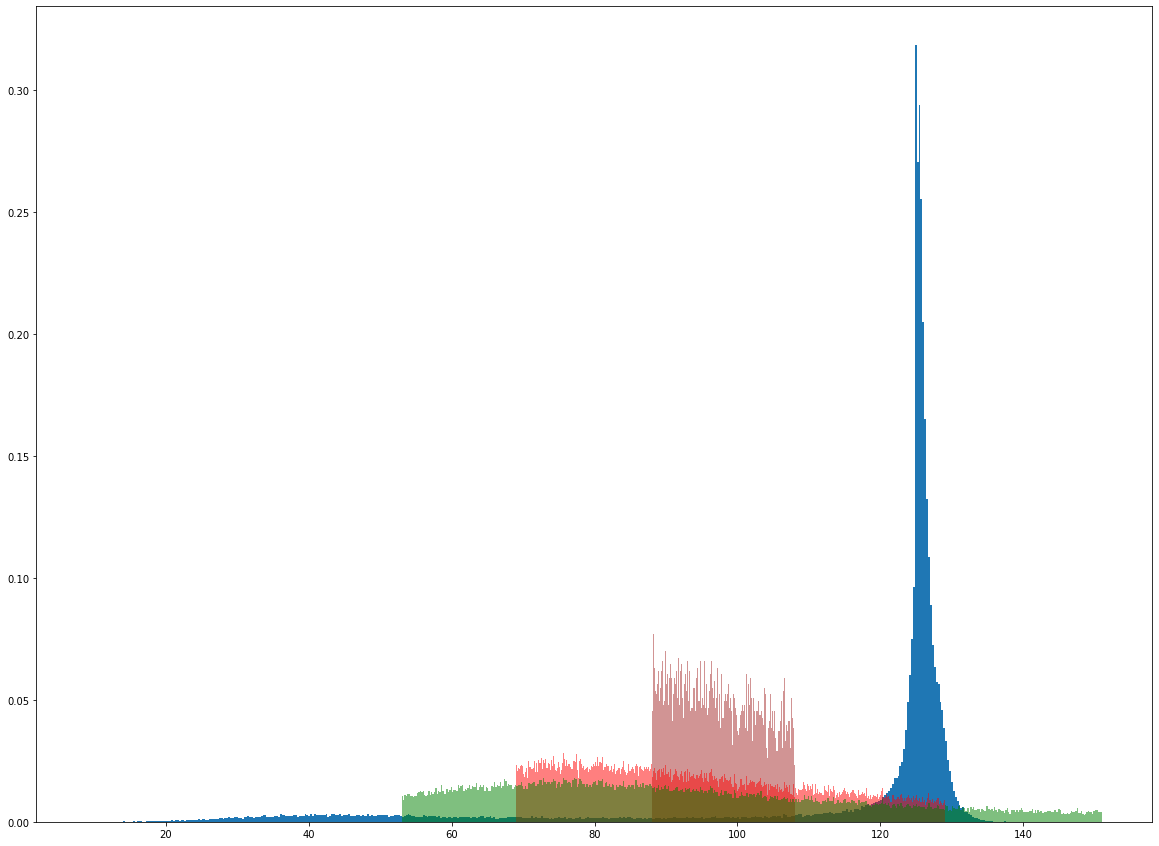

In [73]:
# Cut at 1σ
oneSigAboveProb = 1 - stats.norm.cdf(1)
oneSigBelowProb = stats.norm.cdf(1)
oneSigAbove = stats.poisson.ppf(1 - oneSigAboveProb, meanBG)
oneSigBelow = stats.poisson.ppf(oneSigAboveProb, meanBG)
print(oneSigBelow)
print(oneSigAbove)
newArr1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < oneSigAbove and qcd['mass'][i] > oneSigBelow):
        newArr1.append(qcd['mass'][i])
meanNew = np.mean(newArr1)
newProb = stats.poisson.cdf(125, meanNew)
newSigma = stats.norm.ppf(newProb)
print(newSigma)

# Cut at 3σ
oneSigAboveProb = 1 - stats.norm.cdf(3)
oneSigBelowProb = stats.norm.cdf(3)
oneSigAbove = stats.poisson.ppf(1 - oneSigAboveProb, meanBG)
oneSigBelow = stats.poisson.ppf(oneSigAboveProb, meanBG)
print(oneSigBelow)
print(oneSigAbove)
newArr2 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < oneSigAbove and qcd['mass'][i] > oneSigBelow):
        newArr2.append(qcd['mass'][i])
meanNew = np.mean(newArr2)
newProb = stats.poisson.cdf(125, meanNew)
newSigma = stats.norm.ppf(newProb)
print(newSigma)

# Cut at 5σ
oneSigAboveProb = 1 - stats.norm.cdf(5)
oneSigBelowProb = stats.norm.cdf(5)
oneSigAbove = stats.poisson.ppf(1 - oneSigAboveProb, meanBG)
oneSigBelow = stats.poisson.ppf(oneSigAboveProb, meanBG)
print(oneSigBelow)
print(oneSigAbove)
newArr3 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < oneSigAbove and qcd['mass'][i] > oneSigBelow):
        newArr3.append(qcd['mass'][i])
meanNew = np.mean(newArr3)
newProb = stats.poisson.cdf(125, meanNew)
newSigma = stats.norm.ppf(newProb)
print(newSigma)

plt.hist(higgs['mass'], 500, density=True, stacked=True)
plt.hist(newArr1, 500, density=True, color='black', alpha=.5) # 1σ cut
plt.hist(newArr2, 500, density=True, color='red', alpha=.5) # 2σ cut
plt.hist(newArr3, 500, density=True, color='green', alpha=.5) # 3σ cut
plt.show()

# b. Evaluate expected significance for each set of mass cuts

# c. Identify the set of the mass cuts which give you the highest significance.

## 3) Make stacked histogram plots for the reset of features

# a. Set A of plots without any event selection

# b. Set B of plots with your optimal mass cuts

## 4) Optimize event selections using multiple features (if necessary

# a. Find a set of feature cuts which can help you to achieve the best significance.

# b. Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings.

## 5) Bonus

# a. Plot 2-dimensional scattering plots between top two most discriminative features